In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
uber_trips=pd.read_csv('uber_drives.csv')

In [6]:
uber_trips.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
uber_trips.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [8]:
uber_trips.shape

(1156, 7)

In [9]:
uber_trips.size

8092

In [10]:
uber_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [11]:
uber_trips.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [12]:
uber_trips.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [13]:
start_dest = uber_trips['START*'].dropna()
unique_start = set(start_dest)
unique_start
len(unique_start)

177

In [14]:
stop_dest = uber_trips['STOP*'].dropna()
unique_stop = set(stop_dest)
len(unique_stop)

188

In [15]:
uber = uber_trips.copy()
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [16]:
#Confirm if there are any null values
uber.isnull().values.any()

True

In [17]:
# How many missing values are present
uber.isnull().values.sum()

507

In [18]:
uber.dropna(inplace=True)
uber

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [19]:
#Renaming original columns for easy referencing
uber.rename(columns = {'START_DATE*':'Start_Date', 'END_DATE*':'End_Date',
                              'CATEGORY*':'Category', 'START*':'Start', 'STOP*':'Stop', 'MILES*':'Miles', 'PURPOSE*':'Purpose'}, inplace = True)

In [20]:
uber.head()

,Start_Date,End_Date,Category,Start,Stop,Miles,Purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [22]:
import datetime 
import calendar

In [23]:
#Split the start_date and end_date into hour,day,day of the week, month and weekday
uber['Start_Date'] = pd.to_datetime(uber['Start_Date'], format="%m/%d/%Y %H:%M")
uber['End_Date'] = pd.to_datetime(uber['End_Date'], format="%m/%d/%Y %H:%M")
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in uber['Start_Date']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
uber['HOUR']=hour
uber['DAY']=day
uber['DAY_OF_WEEK']=dayofweek
uber['MONTH']=month
uber['WEEKDAY']=weekday

In [24]:
uber.head()

,Start_Date,End_Date,Category,Start,Stop,Miles,Purpose,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [25]:
uber.dtypes

Start_Date     datetime64[ns]
End_Date       datetime64[ns]
Category               object
Start                  object
Stop                   object
Miles                 float64
Purpose                object
HOUR                    int64
DAY                     int64
DAY_OF_WEEK             int64
MONTH                   int64
WEEKDAY                object
dtype: object

In [48]:
#Get the start destination and the count
start_point = uber['Start']
df = pd.DataFrame(start_point.value_counts())
df.sort_values(['Start'], ascending=False)

df = df.reset_index()
df = df.rename(columns = {'index':'Start Destination', 'Start': 'Count'})
df.loc[df['Count'] == max(df['Count'])]

,Count,count
80,Winston Salem,1


In [29]:
#Get the stop destination and count
stop_point = uber['Stop']
df = pd.DataFrame(stop_point.value_counts())
df.sort_values(['Stop'], ascending=False)

df = df.reset_index()
df = df.rename(columns = {'index':'Stop Destination', 'Stop': 'Count'})
df.loc[df['Count'] == max(df['Count'])]

,Count,count
88,Winston Salem,1


In [30]:
#Count of trips for the most frequest route
df = uber
df = pd.DataFrame(df.groupby(['Start', 'Stop']).size())
df = df.rename(columns = {0:'Count'})
df = df.sort_values(['Count'], ascending = False)
df.loc[df['Count'] == max(df['Count'])]

,,Count
Start,Stop,
Cary,Morrisville,52


In [31]:
#find out the number of miles for eaach trip purpose
uber_df = uber['Miles'].groupby(uber['Purpose']).sum().sort_values(ascending = False)
uber_df

Purpose
Meeting            2851.3
Customer Visit     2089.5
Meal/Entertain      911.7
Temporary Site      523.7
Errand/Supplies     508.0
Between Offices     197.0
Commute             180.2
Moving               18.2
Airport/Travel       16.5
Charity ($)          15.1
Name: Miles, dtype: float64

In [32]:
#Display top 10 start and stop locations
Start_Point = uber.groupby(['Start']).Stop.value_counts().nlargest(10)
Start_Point

Start             Stop            
Cary              Morrisville         52
Morrisville       Cary                51
Cary              Cary                44
                  Durham              30
Unknown Location  Unknown Location    30
Durham            Cary                29
Kar?chi           Kar?chi             20
Cary              Raleigh             17
Lahore            Lahore              16
Raleigh           Cary                15
Name: count, dtype: int64

In [33]:
#function to display values on each plot
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

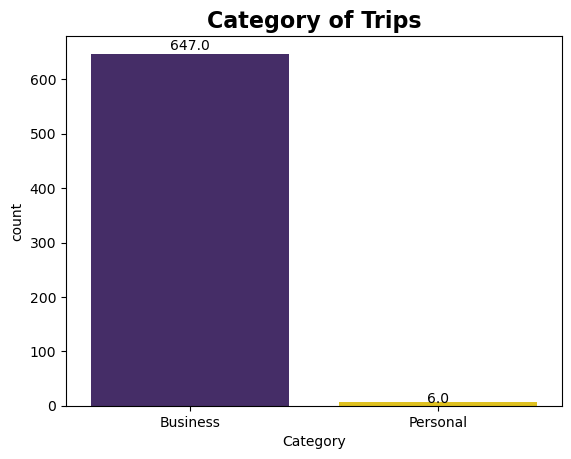

In [34]:
#plot for category column
a = sns.countplot(x='Category', data=uber, palette=['#432371', 'gold'])
plt.title('Category of Trips', weight='bold').set_fontsize('16')
show_values(a)

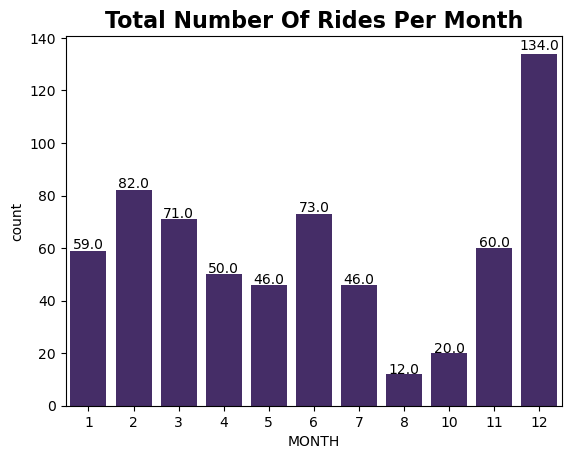

In [35]:
#Plot for number of trips in a month
a = sns.countplot(x='MONTH', data=uber, palette=['#432371'])
plt.title('Total Number Of Rides Per Month', weight='bold').set_fontsize('16')
show_values(a)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


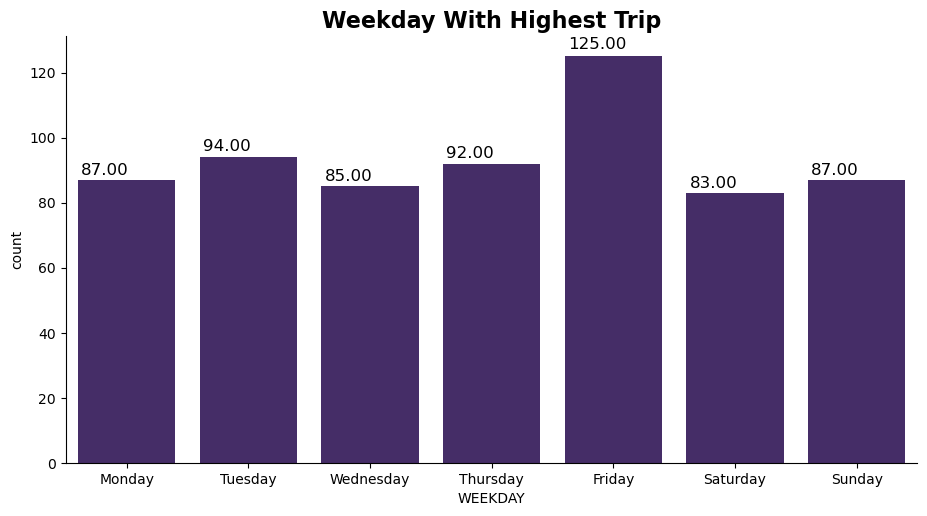

In [38]:
#plot to see the weekday with highest trip
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
g=sns.catplot(data=uber, x="WEEKDAY", kind="count", palette=sns.color_palette(['#432371']), aspect=15/8,order=order)
plt.title('Weekday With Highest Trip', weight='bold').set_fontsize('16')
#function to display values
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.025, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]




In [39]:
#Number of trips for each day of the week
uber.WEEKDAY.value_counts()

WEEKDAY
Friday       125
Tuesday       94
Thursday      92
Sunday        87
Monday        87
Wednesday     85
Saturday      83
Name: count, dtype: int64

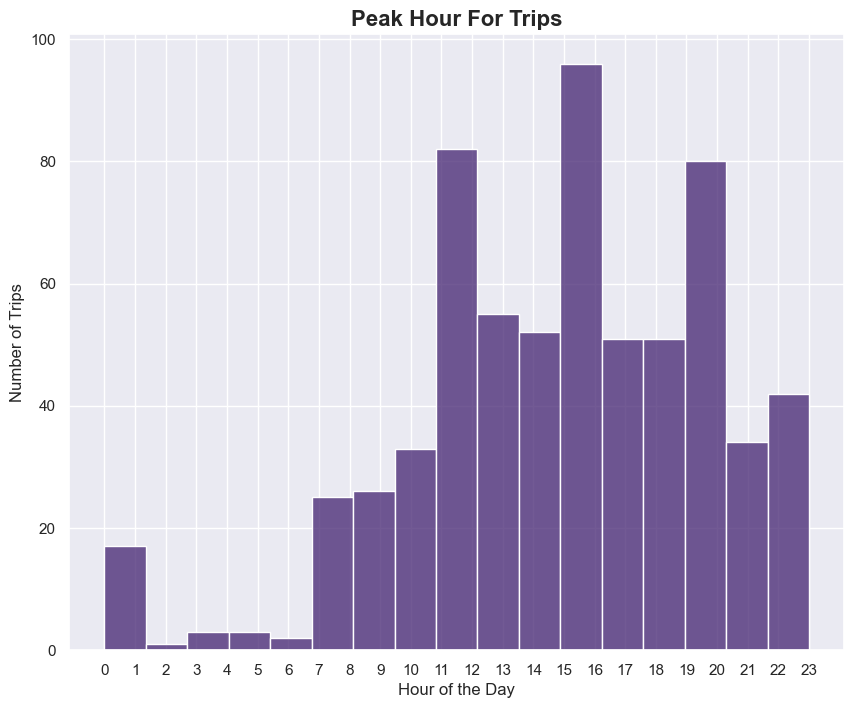

In [41]:
# Set figure size before plotting
sns.set(rc={'figure.figsize': (10, 8)})

# Plot with correct color parameter (no list)
sns.histplot(x='HOUR', data=uber, color='#432371').set(title='Hour Most People Use Uber')

# Set plot title with proper styling
plt.title('Peak Hour For Trips', weight='bold', fontsize=16)

# Optional: Label axes and customize ticks
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))  # Adjust based on your data range

plt.show()


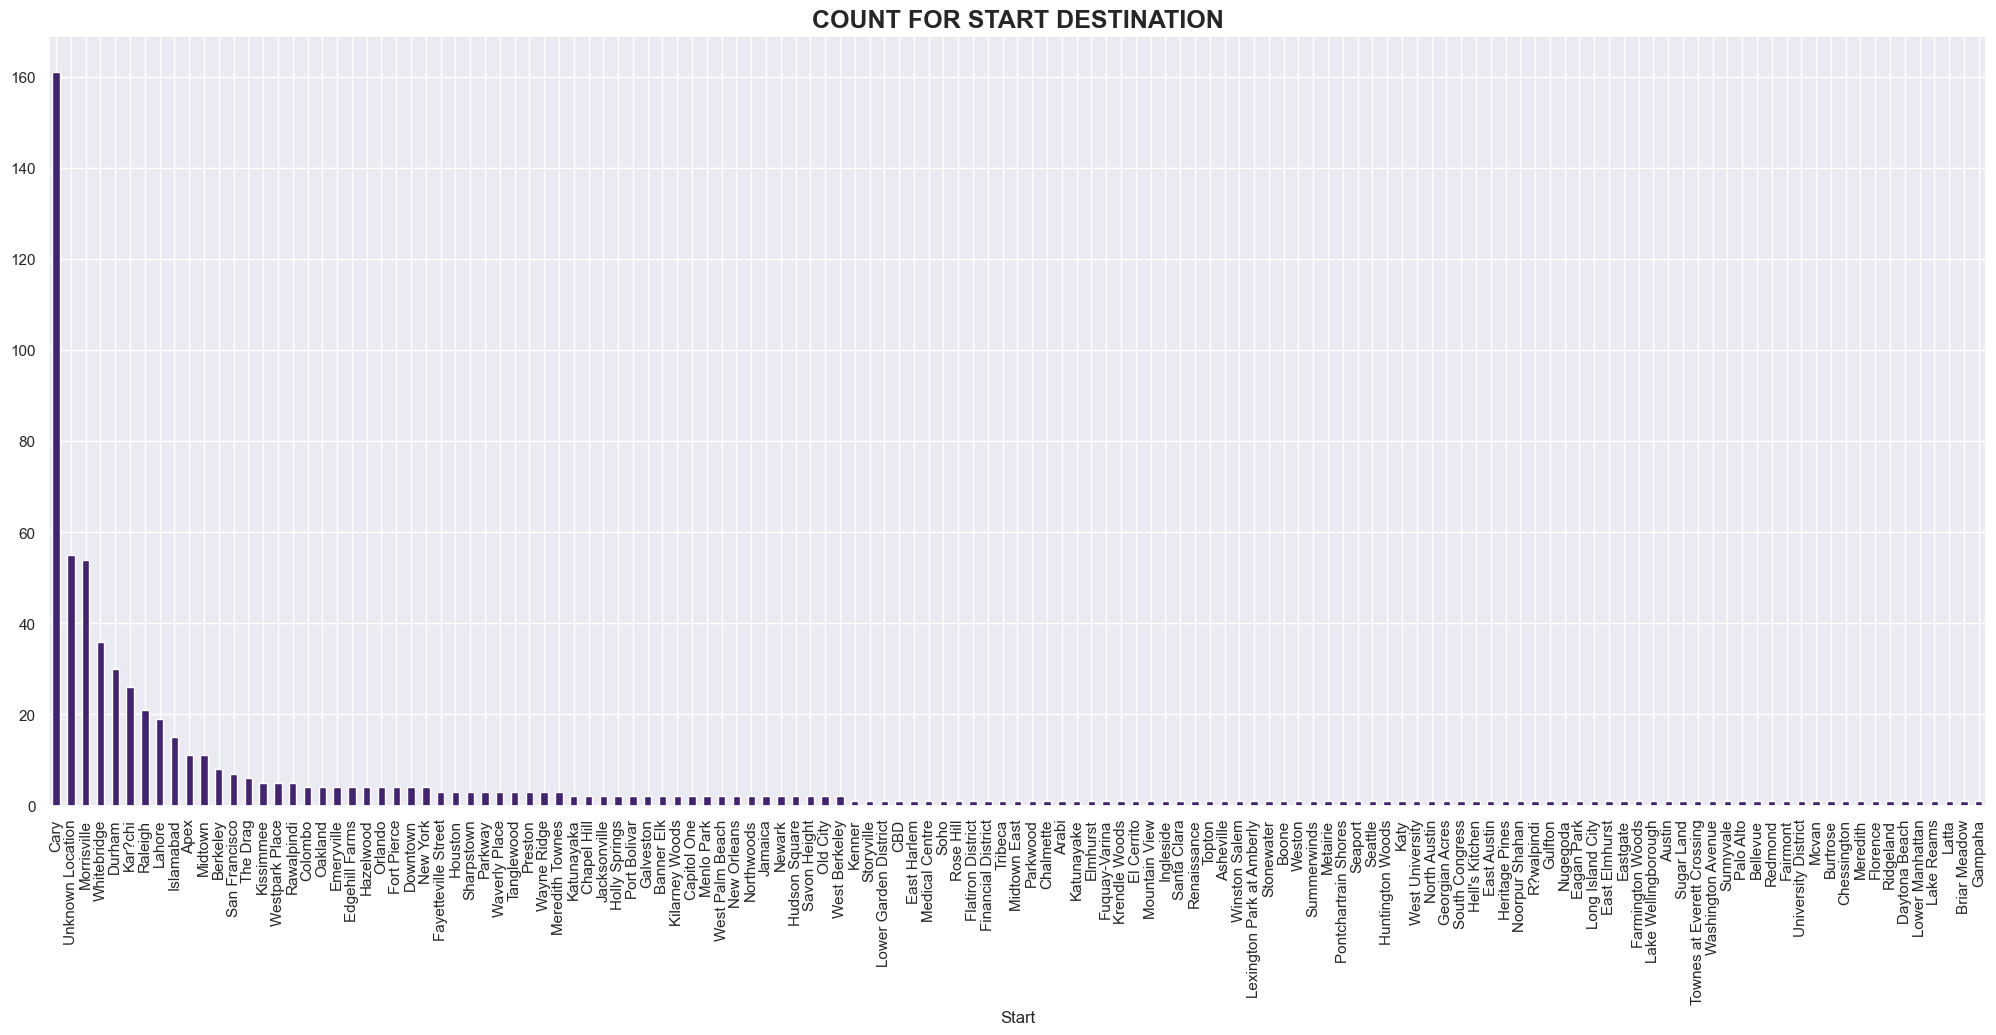

In [46]:
#plot to check travel milage for each start destination
uber['Start'].value_counts().plot(kind='bar', figsize=(25,10),color='#432371')
plt.title('COUNT FOR START DESTINATION', weight='bold').set_fontsize('18')

In [47]:
uber.Start.value_counts()


Start
Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
                   ... 
Lower Manhattan       1
Lake Reams            1
Latta                 1
Briar Meadow          1
Gampaha               1
Name: count, Length: 131, dtype: int64